In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
#X -> dados de entrada, as caracteristicas de cada exemplo
X = [[0], [1], [2], [3], [4]]
#y -> dados de saída, objetivo alvo de predição
y = [0, 0, 1, 1, 0]

In [60]:
neigh = KNeighborsClassifier() # Por padrão k é 5 vizinhos mais próximos
neigh.fit(X, y) #Treinamento do MA por KNN

KNeighborsClassifier()

In [61]:
neigh.kneighbors(X, return_distance=False)

array([[0, 1, 2, 3, 4],
       [1, 0, 2, 3, 4],
       [2, 1, 3, 0, 4],
       [3, 4, 2, 1, 0],
       [4, 3, 2, 1, 0]], dtype=int64)

In [62]:
neigh.predict([[1.1]])

array([0])

In [63]:
neigh.predict_proba([[1.1]])

array([[0.6, 0.4]])

In [64]:
neigh = KNeighborsClassifier(n_neighbors=3) # k é 3 vizinhos mais próximos
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [65]:
neigh.kneighbors(X, return_distance=False)

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 3],
       [3, 2, 4],
       [4, 3, 2]], dtype=int64)

In [66]:
neigh.predict([[1.1]])

array([0])

In [67]:
neigh.predict_proba([[1.1]])

array([[0.66666667, 0.33333333]])

In [68]:
iris = pd.read_csv('dataset/iris.data', names=['sep-lenght', 'sep-width', 'pet-lenght', 'pet-width', 'class'])
iris.head()

,sep-lenght,sep-width,pet-lenght,pet-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
X = iris.iloc[:,:4] #all parameters
y = iris["class"] #class labels

In [70]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y) 
clf.kneighbors(X, return_distance=False)

array([[  0,  17,   4],
       [  1,  45,  12],
       [  2,  47,   3],
       [  3,  47,  29],
       [  4,   0,  17],
       [  5,  18,  10],
       [  6,  47,   2],
       [  7,  39,  49],
       [  8,  38,   3],
       [ 37,  34,   9],
       [ 10,  48,  27],
       [ 11,  29,   7],
       [ 12,   1,  34],
       [ 13,  38,  42],
       [ 14,  33,  16],
       [ 15,  33,  14],
       [ 16,  10,  48],
       [ 17,   0,  40],
       [ 18,   5,  10],
       [ 19,  21,  46],
       [ 20,  31,  27],
       [ 21,  19,  46],
       [ 22,   6,   2],
       [ 23,  26,  43],
       [ 24,  11,  29],
       [ 25,   9,  34],
       [ 26,  23,  43],
       [ 27,  28,   0],
       [ 28,  27,   0],
       [ 29,  30,   3],
       [ 30,  29,  34],
       [ 31,  20,  27],
       [ 32,  46,  33],
       [ 33,  32,  15],
       [ 37,  34,   9],
       [ 35,  49,   1],
       [ 36,  10,  31],
       [ 37,  34,   9],
       [ 38,   8,  42],
       [ 39,   7,   0],
       [ 40,  17,   0],
       [ 41,   8

In [71]:
_y = iris['class'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                        [0, 1, 2], inplace=True)
_x = iris[['sep-lenght', 'sep-width']]
clf.fit(_x, y)
clf.kneighbors(_x, return_distance=False)

array([[  0,  17,  40],
       [  1,  25,   9],
       [ 29,   2,  47],
       [  3,  47,   2],
       [  4,  43,  40],
       [  5,  16,  10],
       [  6,  47,  24],
       [ 26,   7,  39],
       [  8,  38,  13],
       [ 37,   9,  34],
       [ 10,  48,   5],
       [ 11,  24,  26],
       [ 12,  45,  30],
       [ 13,  38,   8],
       [ 14,  18,  33],
       [ 15,  33,  14],
       [  5,  16,  10],
       [  0,  17,  40],
       [ 18,  14,  10],
       [ 19,  46,  44],
       [ 31,  20,  36],
       [ 21,  44,  46],
       [ 22,   6,  24],
       [ 23,  49,  39],
       [ 11,  24,  26],
       [ 25,   1,   9],
       [ 26,   7,  39],
       [ 27,  28,   0],
       [ 28,  27,  39],
       [ 29,   2,  47],
       [ 30,  12,  45],
       [ 31,  20,  36],
       [ 32,  16,   5],
       [ 33,  15,  32],
       [ 37,   9,  34],
       [ 35,  49,  23],
       [ 36,  20,  31],
       [ 37,   9,  34],
       [ 38,   8,  13],
       [ 39,   7,  26],
       [ 40,  43,   0],
       [ 41,  57

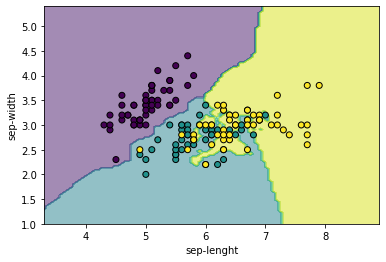

In [72]:
disp = DecisionBoundaryDisplay.from_estimator(
     clf, _x, response_method="predict",
     xlabel='sep-lenght', ylabel='sep-width',
     alpha=0.5
)
disp.ax_.scatter(_x['sep-lenght'], _x['sep-width'], c=y, edgecolors="k")
plt.show()